In [1]:
import pandas as pd

# CSV Files aus weather_and_wildfires.ipynb laden
df3 = pd.read_csv('df3_data.csv')


In [2]:
df3['date'] = pd.to_datetime(df3['date'])

In [3]:
# Rename column um Analyse zu vereinfachen
df3.rename(columns={'states': 'state_name'}, inplace=True)

In [4]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550396 entries, 0 to 550395
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  550396 non-null  datetime64[ns]
 1   average_temp_c        474561 non-null  float64       
 2   minimum_temp_c        502218 non-null  float64       
 3   maximum_temp_c        502541 non-null  float64       
 4   precipitation_mm      442942 non-null  float64       
 5   snow_mm               322039 non-null  float64       
 6   wind_direction_deg    116755 non-null  float64       
 7   windspeed_kmh         479642 non-null  float64       
 8   peak_wind_gust_kmh    19844 non-null   float64       
 9   air_pressure_hpa      412122 non-null  float64       
 10  sunshine_min          96923 non-null   float64       
 11  station_id            550396 non-null  object        
 12  weather_station_name  550396 non-null  object        
 13 

USA

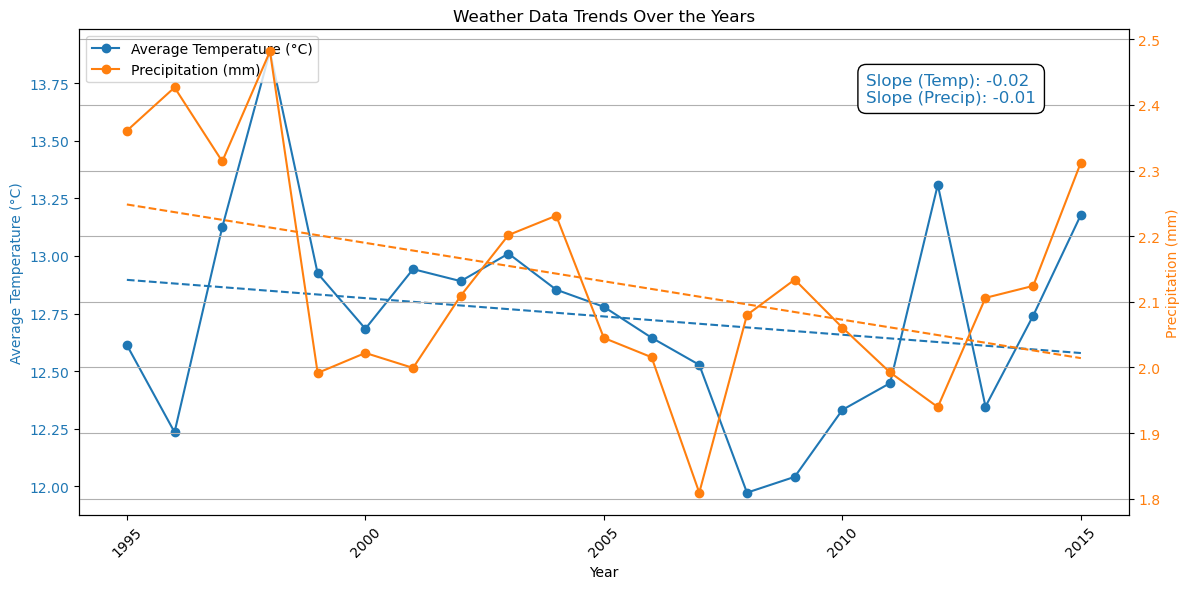

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Group your data by year and calculate the average for each column
yearly_data = df3.groupby('year')[['average_temp_c', 'precipitation_mm']].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature (left y-axis)
ax1.plot(yearly_data.index, yearly_data['average_temp_c'], label='Average Temperature (°C)', marker='o', linestyle='-', color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Calculate and plot the trendline for temperature
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(yearly_data.index, yearly_data['average_temp_c'])
trendline_temp = slope_temp * yearly_data.index + intercept_temp
ax1.plot(yearly_data.index, trendline_temp, color='tab:blue', linestyle='--', label=f'Temperature Trendline (r={r_value_temp:.2f})')

# Precipitation
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['precipitation_mm'], label='Precipitation (mm)', marker='o', linestyle='-', color='tab:orange')
ax2.set_ylabel('Precipitation (mm)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Calculate and plot the trendline for precipitation
slope_precip, intercept_precip, r_value_precip, p_value_precip, std_err_precip = linregress(yearly_data.index, yearly_data['precipitation_mm'])
trendline_precip = slope_precip * yearly_data.index + intercept_precip
ax2.plot(yearly_data.index, trendline_precip, color='tab:orange', linestyle='--', label=f'Precipitation Trendline (r={r_value_precip:.2f})')

# Set x-axis labels at 5-year intervals
x_ticks = np.arange(yearly_data.index.min(), yearly_data.index.max() + 1, 5)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks, rotation=45)

# Legends
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# Annotate the slope information in an extra box on the right
slope_info = f'Slope (Temp): {slope_temp:.2f}\nSlope (Precip): {slope_precip:.2f}'
plt.annotate(slope_info, (0.75, 0.85), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'), color='tab:blue')

plt.title('Weather Data Trends Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

# Over the period of 20 years (1995 - 2015) for the entire USA, the average temperature decreased by approximately -0.02 degrees Celsius per year, 
# while the precipitation decreased by approximately -0.01 millimeters per year

Top 5 States Combined

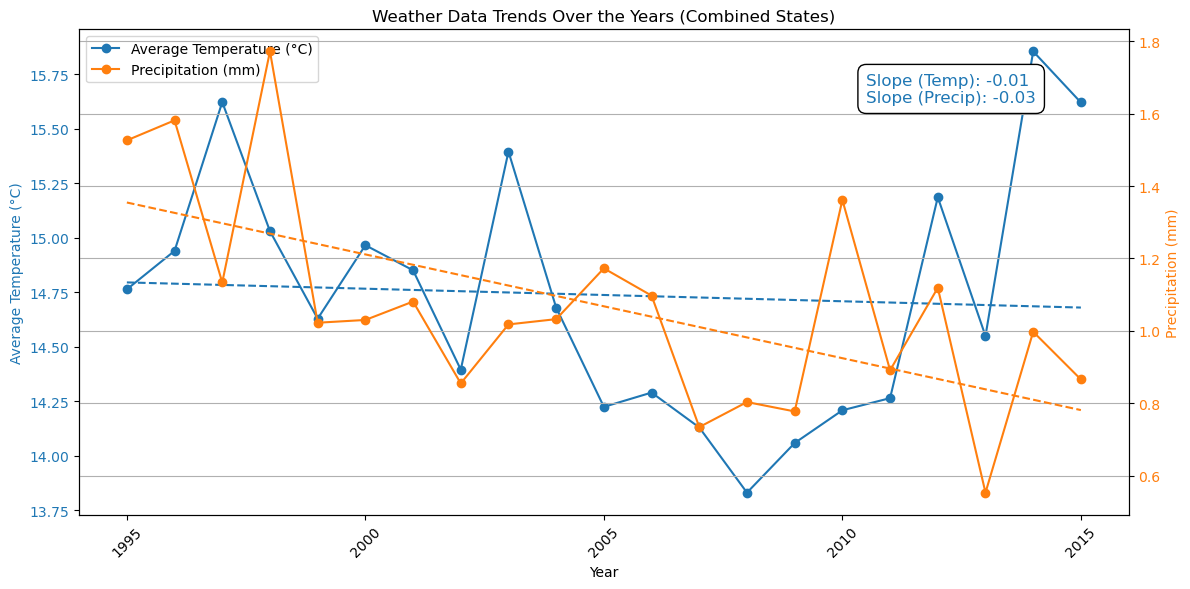

In [40]:
# Filter the data for the selected states
selected_states = ['Idaho', 'Oregon', 'California', 'Arizona', 'New Mexico']
filtered_data = df3[df3['state_name'].isin(selected_states)]

# Group your filtered data by year and calculate the average for each column
yearly_data = filtered_data.groupby('year')[['average_temp_c', 'precipitation_mm']].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature (left y-axis)
ax1.plot(yearly_data.index, yearly_data['average_temp_c'], label='Average Temperature (°C)', marker='o', linestyle='-', color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Calculate and plot the trendline for temperature
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(yearly_data.index, yearly_data['average_temp_c'])
trendline_temp = slope_temp * yearly_data.index + intercept_temp
ax1.plot(yearly_data.index, trendline_temp, color='tab:blue', linestyle='--', label=f'Temperature Trendline (r={r_value_temp:.2f})')

# Precipitation
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['precipitation_mm'], label='Precipitation (mm)', marker='o', linestyle='-', color='tab:orange')
ax2.set_ylabel('Precipitation (mm)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Calculate and plot the trendline for precipitation
slope_precip, intercept_precip, r_value_precip, p_value_precip, std_err_precip = linregress(yearly_data.index, yearly_data['precipitation_mm'])
trendline_precip = slope_precip * yearly_data.index + intercept_precip
ax2.plot(yearly_data.index, trendline_precip, color='tab:orange', linestyle='--', label=f'Precipitation Trendline (r={r_value_precip:.2f})')

# Set x-axis labels at 5-year intervals
x_ticks = np.arange(yearly_data.index.min(), yearly_data.index.max() + 1, 5)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks, rotation=45)

# Legends
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# Annotate the slope information in an extra box on the right
slope_info = f'Slope (Temp): {slope_temp:.2f}\nSlope (Precip): {slope_precip:.2f}'
plt.annotate(slope_info, (0.75, 0.85), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'), color='tab:blue')

plt.title('Weather Data Trends Over the Years (Combined States)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Over the period of 20 years (1995 - 2015) for the combined states (Idaho, Oregon, California, Arizona, New Mexico),
# the average temperature decreased by approximately -0.02 degrees Celsius per year,
# while the precipitation decreased by approximately -0.01 millimeters per year


Idaho

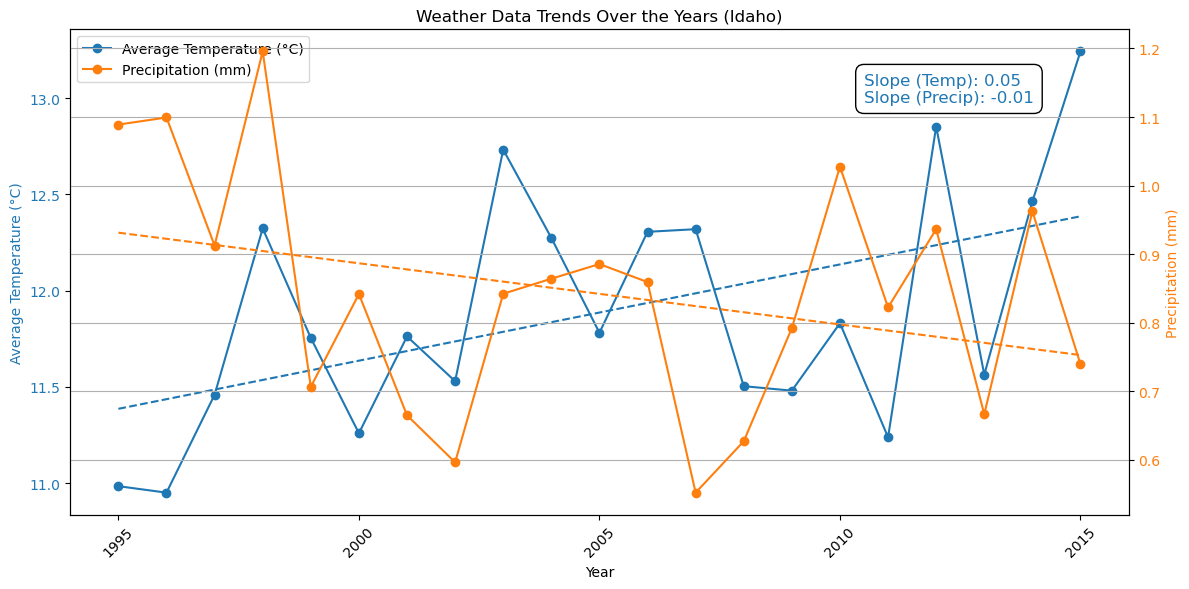

In [29]:
# Filter the data for the state of Idaho
idaho_data = df3[df3['state_name'] == 'Idaho']

# Group the filtered data by year and calculate the average for each column
yearly_data = idaho_data.groupby('year')[['average_temp_c', 'precipitation_mm']].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature (left y-axis)
ax1.plot(yearly_data.index, yearly_data['average_temp_c'], label='Average Temperature (°C)', marker='o', linestyle='-', color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Calculate and plot the trendline for temperature
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(yearly_data.index, yearly_data['average_temp_c'])
trendline_temp = slope_temp * yearly_data.index + intercept_temp
ax1.plot(yearly_data.index, trendline_temp, color='tab:blue', linestyle='--', label=f'Temperature Trendline (r={r_value_temp:.2f})')

# Precipitation
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['precipitation_mm'], label='Precipitation (mm)', marker='o', linestyle='-', color='tab:orange')
ax2.set_ylabel('Precipitation (mm)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Calculate and plot the trendline for precipitation
slope_precip, intercept_precip, r_value_precip, p_value_precip, std_err_precip = linregress(yearly_data.index, yearly_data['precipitation_mm'])
trendline_precip = slope_precip * yearly_data.index + intercept_precip
ax2.plot(yearly_data.index, trendline_precip, color='tab:orange', linestyle='--', label=f'Precipitation Trendline (r={r_value_precip:.2f})')

# Set x-axis labels at 5-year intervals
x_ticks = np.arange(yearly_data.index.min(), yearly_data.index.max() + 1, 5)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks, rotation=45)

# Legends
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# Annotate the slope information in an extra box on the right
slope_info = f'Slope (Temp): {slope_temp:.2f}\nSlope (Precip): {slope_precip:.2f}'
plt.annotate(slope_info, (0.75, 0.85), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'), color='tab:blue')

plt.title('Weather Data Trends Over the Years (Idaho)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Over the period of 20 years (1995 - 2015) for Idaho, the average temperature increase by approximately 0.05 degrees Celsius per year, 
# while the precipitation decreased by approximately -0.01 millimeters per year


Oregon

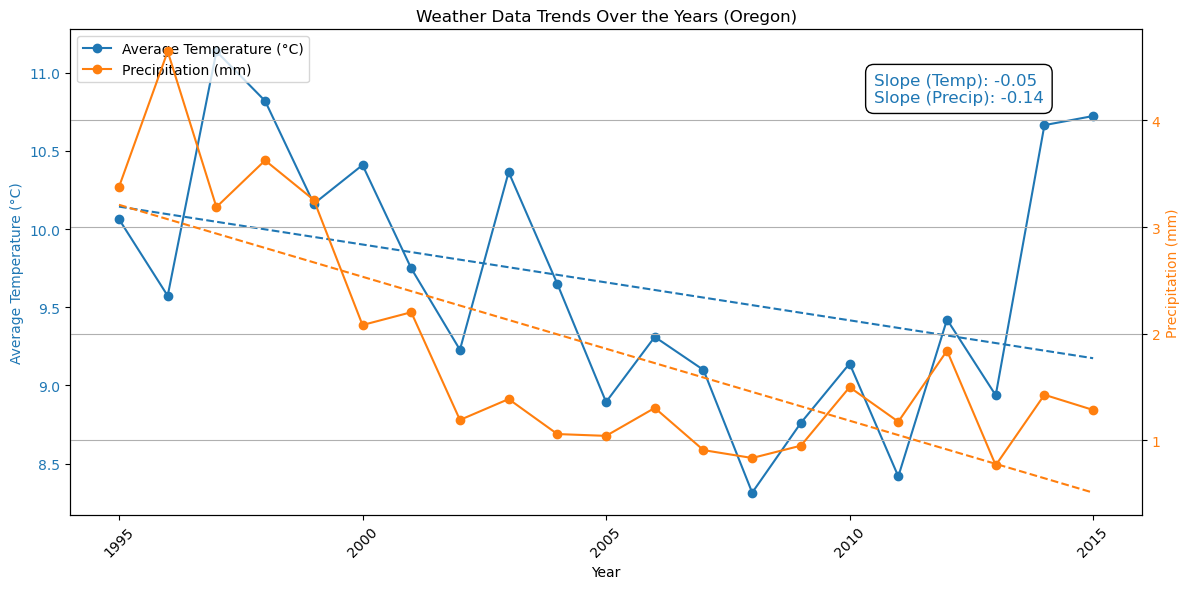

In [30]:
# Filter the data for the state of Oregon
oregon_data = df3[df3['state_name'] == 'Oregon']

# Group the filtered data by year and calculate the average for each column
yearly_data = oregon_data.groupby('year')[['average_temp_c', 'precipitation_mm']].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature (left y-axis)
ax1.plot(yearly_data.index, yearly_data['average_temp_c'], label='Average Temperature (°C)', marker='o', linestyle='-', color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Calculate and plot the trendline for temperature
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(yearly_data.index, yearly_data['average_temp_c'])
trendline_temp = slope_temp * yearly_data.index + intercept_temp
ax1.plot(yearly_data.index, trendline_temp, color='tab:blue', linestyle='--', label=f'Temperature Trendline (r={r_value_temp:.2f})')

# Precipitation
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['precipitation_mm'], label='Precipitation (mm)', marker='o', linestyle='-', color='tab:orange')
ax2.set_ylabel('Precipitation (mm)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Calculate and plot the trendline for precipitation
slope_precip, intercept_precip, r_value_precip, p_value_precip, std_err_precip = linregress(yearly_data.index, yearly_data['precipitation_mm'])
trendline_precip = slope_precip * yearly_data.index + intercept_precip
ax2.plot(yearly_data.index, trendline_precip, color='tab:orange', linestyle='--', label=f'Precipitation Trendline (r={r_value_precip:.2f})')

# Set x-axis labels at 5-year intervals
x_ticks = np.arange(yearly_data.index.min(), yearly_data.index.max() + 1, 5)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks, rotation=45)

# Legends
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# Annotate the slope information in an extra box on the right
slope_info = f'Slope (Temp): {slope_temp:.2f}\nSlope (Precip): {slope_precip:.2f}'
plt.annotate(slope_info, (0.75, 0.85), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'), color='tab:blue')

plt.title('Weather Data Trends Over the Years (Oregon)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Over the period of 20 years (1995 - 2015) for Oregon, the average temperature decreased by approximately -0.05 degrees Celsius per year, 
# while the precipitation decreased by approximately -0.14 millimeters per year

California

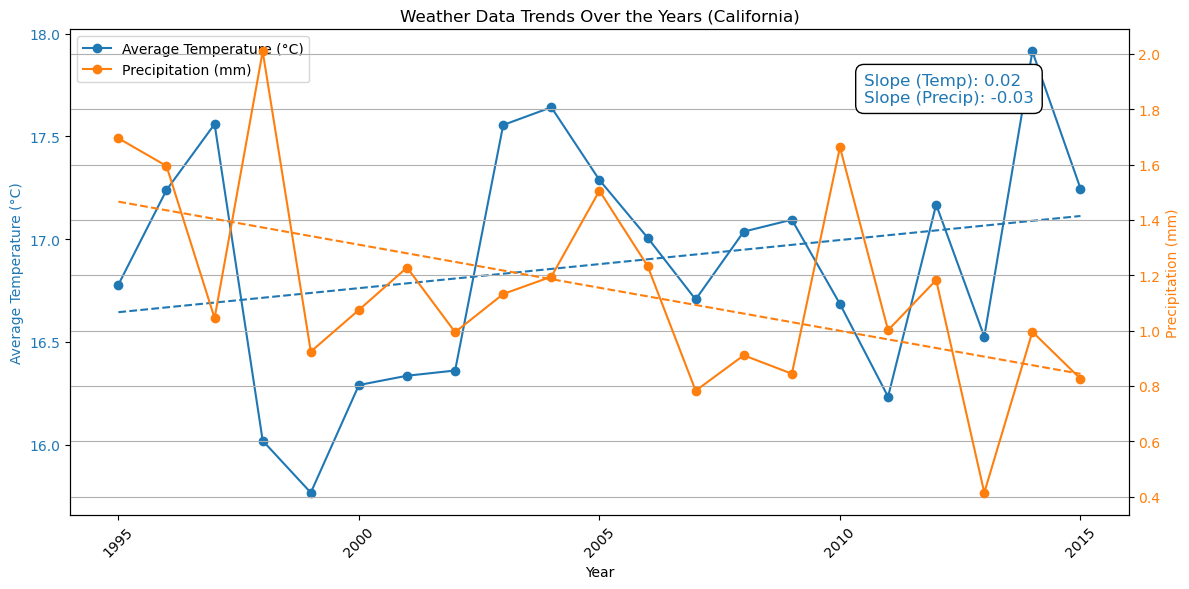

In [31]:
# Filter the data for the state of California
california_data = df3[df3['state_name'] == 'California']

# Group the filtered data by year and calculate the average for each column
yearly_data = california_data.groupby('year')[['average_temp_c', 'precipitation_mm']].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature (left y-axis)
ax1.plot(yearly_data.index, yearly_data['average_temp_c'], label='Average Temperature (°C)', marker='o', linestyle='-', color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Calculate and plot the trendline for temperature
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(yearly_data.index, yearly_data['average_temp_c'])
trendline_temp = slope_temp * yearly_data.index + intercept_temp
ax1.plot(yearly_data.index, trendline_temp, color='tab:blue', linestyle='--', label=f'Temperature Trendline (r={r_value_temp:.2f})')

# Precipitation
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['precipitation_mm'], label='Precipitation (mm)', marker='o', linestyle='-', color='tab:orange')
ax2.set_ylabel('Precipitation (mm)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Calculate and plot the trendline for precipitation
slope_precip, intercept_precip, r_value_precip, p_value_precip, std_err_precip = linregress(yearly_data.index, yearly_data['precipitation_mm'])
trendline_precip = slope_precip * yearly_data.index + intercept_precip
ax2.plot(yearly_data.index, trendline_precip, color='tab:orange', linestyle='--', label=f'Precipitation Trendline (r={r_value_precip:.2f})')

# Set x-axis labels at 5-year intervals
x_ticks = np.arange(yearly_data.index.min(), yearly_data.index.max() + 1, 5)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks, rotation=45)

# Legends
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# Annotate the slope information in an extra box on the right
slope_info = f'Slope (Temp): {slope_temp:.2f}\nSlope (Precip): {slope_precip:.2f}'
plt.annotate(slope_info, (0.75, 0.85), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'), color='tab:blue')

plt.title('Weather Data Trends Over the Years (California)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Over the period of 20 years (1995 - 2015) for California, the average temperature increase by approximately 0.02 degrees Celsius per year, 
# while the precipitation decreased by approximately -0.03 millimeters per year


Arizona

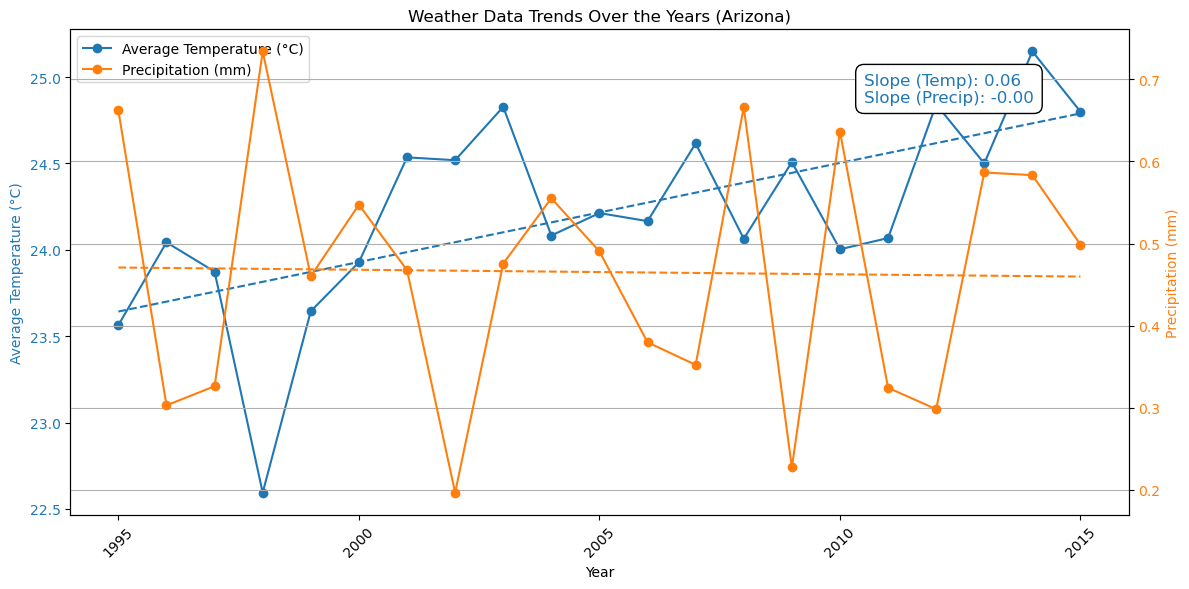

In [33]:
# Filter the data for the state of Arizona
arizona_data = df3[df3['state_name'] == 'Arizona']

# Group the filtered data by year and calculate the average for each column
yearly_data = arizona_data.groupby('year')[['average_temp_c', 'precipitation_mm']].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature (left y-axis)
ax1.plot(yearly_data.index, yearly_data['average_temp_c'], label='Average Temperature (°C)', marker='o', linestyle='-', color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Calculate and plot the trendline for temperature
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(yearly_data.index, yearly_data['average_temp_c'])
trendline_temp = slope_temp * yearly_data.index + intercept_temp
ax1.plot(yearly_data.index, trendline_temp, color='tab:blue', linestyle='--', label=f'Temperature Trendline (r={r_value_temp:.2f})')

# Precipitation
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['precipitation_mm'], label='Precipitation (mm)', marker='o', linestyle='-', color='tab:orange')
ax2.set_ylabel('Precipitation (mm)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Calculate and plot the trendline for precipitation
slope_precip, intercept_precip, r_value_precip, p_value_precip, std_err_precip = linregress(yearly_data.index, yearly_data['precipitation_mm'])
trendline_precip = slope_precip * yearly_data.index + intercept_precip
ax2.plot(yearly_data.index, trendline_precip, color='tab:orange', linestyle='--', label=f'Precipitation Trendline (r={r_value_precip:.2f})')

# Set x-axis labels at 5-year intervals
x_ticks = np.arange(yearly_data.index.min(), yearly_data.index.max() + 1, 5)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks, rotation=45)

# Legends
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# Annotate the slope information in an extra box on the right
slope_info = f'Slope (Temp): {slope_temp:.2f}\nSlope (Precip): {slope_precip:.2f}'
plt.annotate(slope_info, (0.75, 0.85), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'), color='tab:blue')

plt.title('Weather Data Trends Over the Years (Arizona)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Over the period of 20 years (1995 - 2015) for Arizona, the average temperature increased by approximately 0.06 degrees Celsius per year, 
# while the precipitation decreased by approximately -0.00 millimeters per year


New Mexico

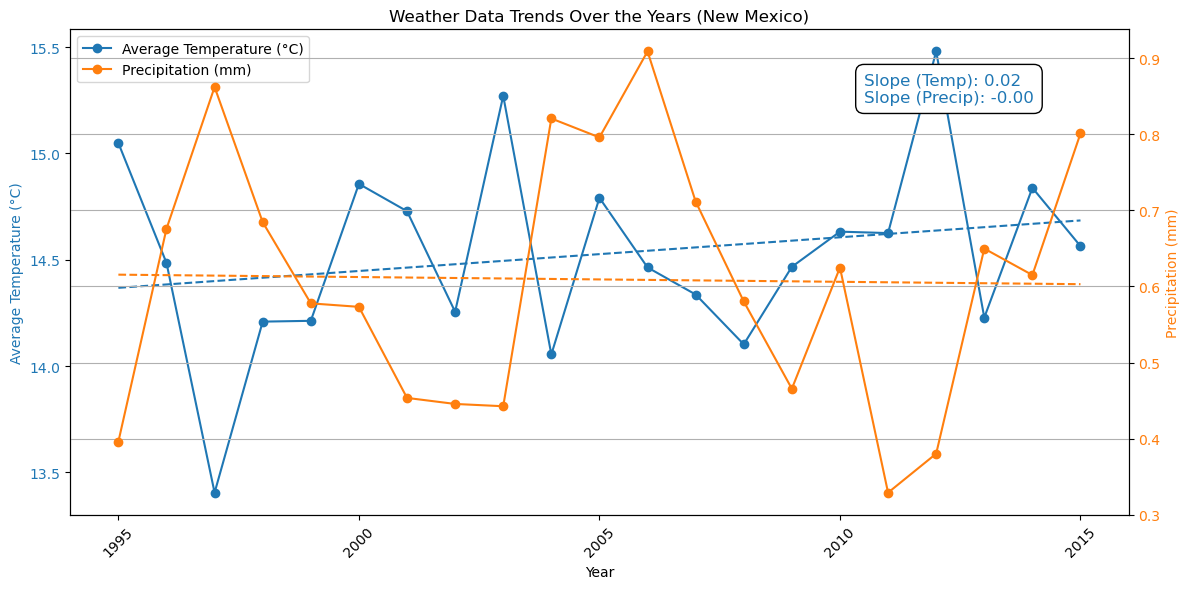

In [34]:
# Filter the data for the state of New Mexico
new_mexico_data = df3[df3['state_name'] == 'New Mexico']

# Group the filtered data by year and calculate the average for each column
yearly_data = new_mexico_data.groupby('year')[['average_temp_c', 'precipitation_mm']].mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Temperature (left y-axis)
ax1.plot(yearly_data.index, yearly_data['average_temp_c'], label='Average Temperature (°C)', marker='o', linestyle='-', color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Calculate and plot the trendline for temperature
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(yearly_data.index, yearly_data['average_temp_c'])
trendline_temp = slope_temp * yearly_data.index + intercept_temp
ax1.plot(yearly_data.index, trendline_temp, color='tab:blue', linestyle='--', label=f'Temperature Trendline (r={r_value_temp:.2f})')

# Precipitation
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['precipitation_mm'], label='Precipitation (mm)', marker='o', linestyle='-', color='tab:orange')
ax2.set_ylabel('Precipitation (mm)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Calculate and plot the trendline for precipitation
slope_precip, intercept_precip, r_value_precip, p_value_precip, std_err_precip = linregress(yearly_data.index, yearly_data['precipitation_mm'])
trendline_precip = slope_precip * yearly_data.index + intercept_precip
ax2.plot(yearly_data.index, trendline_precip, color='tab:orange', linestyle='--', label=f'Precipitation Trendline (r={r_value_precip:.2f})')

# Set x-axis labels at 5-year intervals
x_ticks = np.arange(yearly_data.index.min(), yearly_data.index.max() + 1, 5)
ax1.set_xticks(x_ticks)
ax1.set_xticklabels(x_ticks, rotation=45)

# Legends
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# Annotate the slope information in an extra box on the right
slope_info = f'Slope (Temp): {slope_temp:.2f}\nSlope (Precip): {slope_precip:.2f}'
plt.annotate(slope_info, (0.75, 0.85), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white'), color='tab:blue')

plt.title('Weather Data Trends Over the Years (New Mexico)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Over the period of 20 years (1995 - 2015) for New Mexico, the average temperature increased by approximately 0.02 degrees Celsius per year, 
# while the precipitation decreased by approximately -0.00 millimeters per year
